# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Ihya Razky Hidayat   
**NIM:** 122140167

**Github:**   https://github.com/Ecstarssyy/Multimedia

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


In [42]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

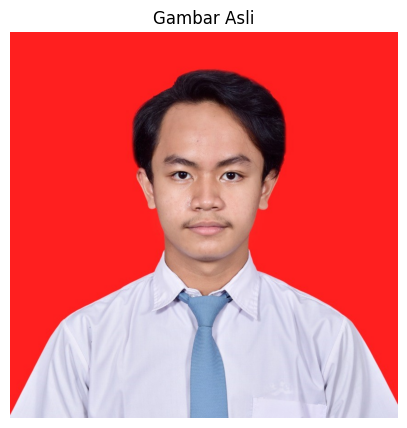

In [48]:
#load image
img = cv2.imread("Razky.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W, _ = img_rgb.shape

plt.figure(figsize=(5,7))
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

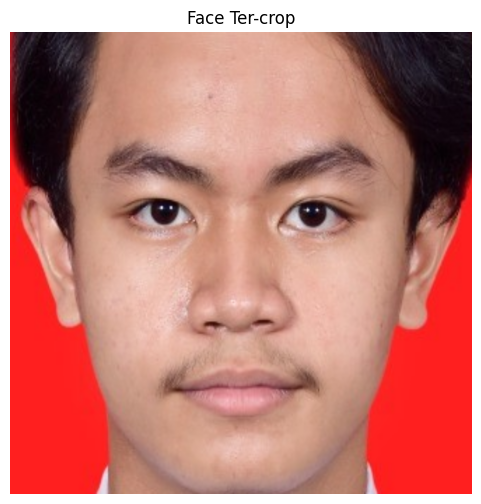

In [ ]:
#crop manual
face_crop = img_rgb[200:500, 270:600]   
face_crop = cv2.resize(face_crop, (920, 920))

#Crop background 
bg_crop = img_rgb[0:700, 850:W]         # pure red area
bg_crop = cv2.resize(bg_crop, (920, 920))

#plot face crop
plt.figure(figsize=(6,6))
plt.imshow(face_crop)
plt.title("Face Ter-crop")
plt.axis("off")
plt.show()


In [90]:
#konversi warna
gray = cv2.cvtColor(face_crop, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(face_crop, cv2.COLOR_RGB2HSV)

In [91]:
#Anotasi Nama
annotated = face_crop.copy()
cv2.putText(
    annotated,
    "Razky",
    (50, 120),
    cv2.FONT_HERSHEY_SIMPLEX,
    3,
    (255, 255, 255),
    6,
    cv2.LINE_AA
)

array([[[175,  24,  31],
        [174,  24,  31],
        [166,  25,  34],
        ...,
        [ 37,   8,  18],
        [ 42,  11,  19],
        [ 42,  11,  19]],

       [[175,  24,  31],
        [174,  24,  31],
        [166,  26,  34],
        ...,
        [ 37,   9,  18],
        [ 41,  11,  19],
        [ 42,  11,  19]],

       [[174,  24,  31],
        [173,  25,  31],
        [165,  26,  34],
        ...,
        [ 38,  10,  19],
        [ 40,  10,  18],
        [ 40,  10,  18]],

       ...,

       [[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]],

       [[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]],

       [[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]]

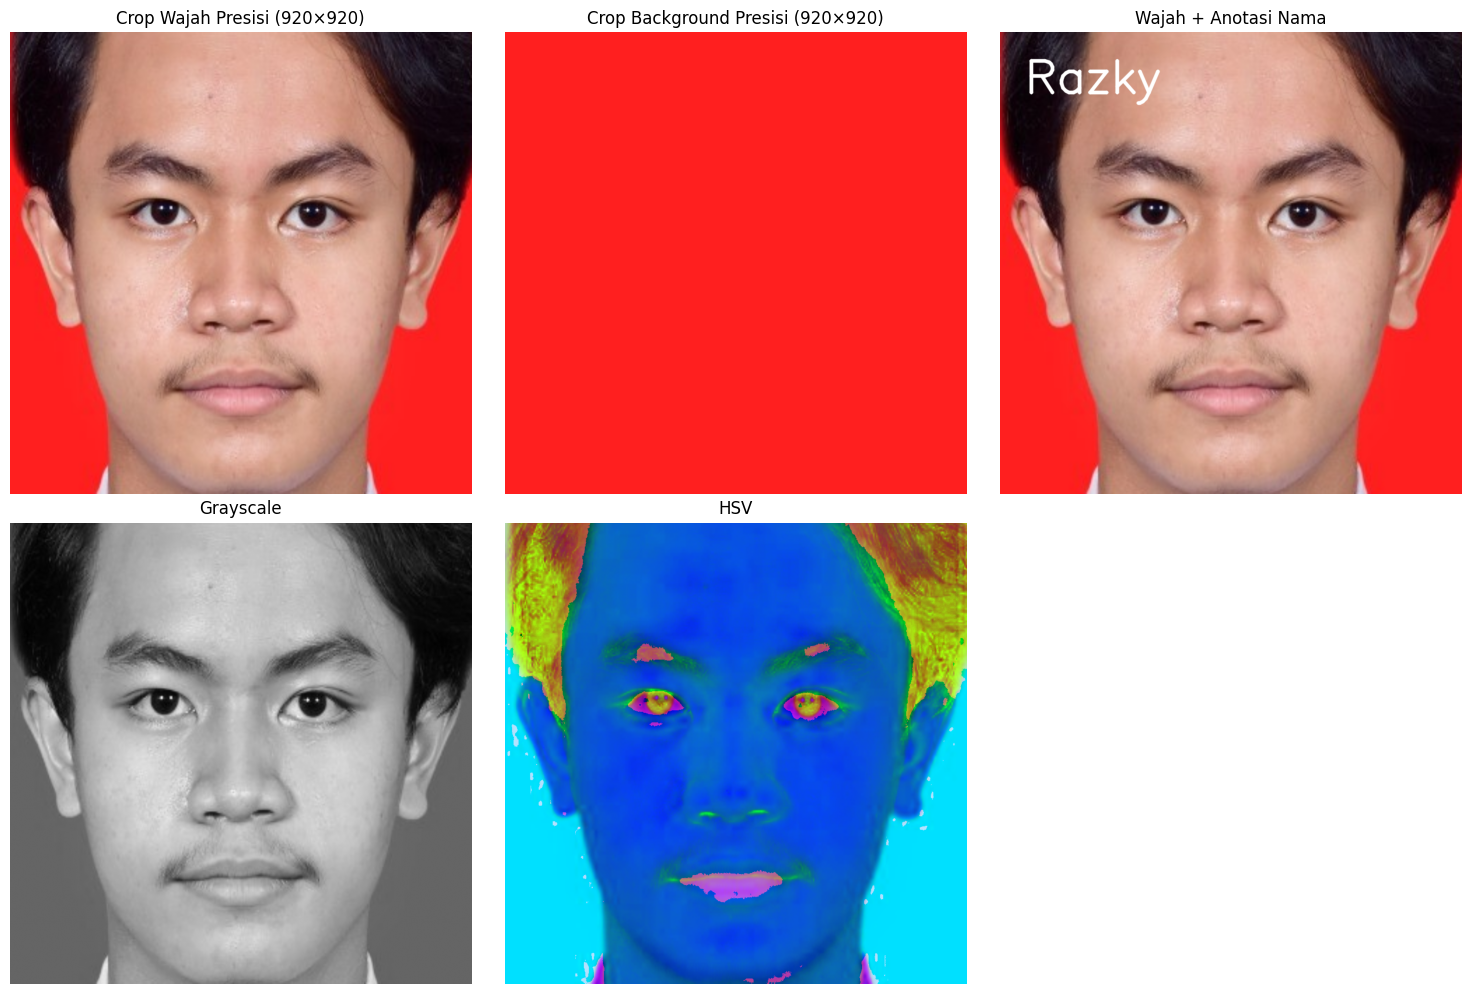

In [92]:
#plotting hasil
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(face_crop); plt.title("Crop Wajah Presisi (920×920)")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(bg_crop); plt.title("Crop Background Presisi (920×920)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(annotated); plt.title("Wajah + Anotasi Nama")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(gray, cmap="gray"); plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(hsv); plt.title("HSV")
plt.axis("off")

plt.tight_layout()
plt.show()

## **1. Cropping Manual**

Pada soal ini dilakukan *cropping secara manual* tanpa bantuan deteksi otomatis.  
Cropping ditentukan dengan memilih koordinat tertentu pada gambar asli menggunakan indeks array NumPy.

### **a. Crop Wajah (Persegi)**  
Potongan wajah diambil pada koordinat:

```
y: 200 → 500  
x: 270 → 600
```

Area ini menghasilkan bagian wajah yang presisi dan proporsional, kemudian di-*resize* menjadi:

```
920 × 920 piksel
```

Crop wajah ini berfungsi untuk memfokuskan area penting (fitur wajah), sehingga bagian yang tidak relevan seperti bahu atau latar belakang tidak ikut masuk.

### **b. Crop Background (Persegi Panjang)**  
Potongan latar belakang merah diambil pada koordinat:

```
y: 0 → 700  
x: 850 → lebar gambar
```

Ini menghasilkan area murni background merah yang bersih, yang kemudian juga di-*resize* menjadi:

```
920 × 920 piksel
```

Crop background digunakan sebagai pembanding antara foreground (wajah) dan background, serta membantu melihat distribusi warna asli.

---


## Perubahan Warna
### 1. Citra Grayscale

* Pada grayscale, gambar dikonversi menjadi satu channel intensitas cahaya.

* Informasi warna dihilangkan.

* Menampilkan hanya tingkat kecerahan.

* Berguna untuk deteksi tepi dan pengolahan citra berbasis intensitas.

### 2. Citra HSV

* Model warna HSV terdiri dari:

* Hue (H) → jenis warna

* Saturation (S) → tingkat kejenuhan

* Value (V) → tingkat kecerahan

## Efek konversi ke HSV:

* Informasi warna dipisahkan dari kecerahan.

* Lebih stabil untuk segmentasi warna meskipun kondisi cahaya berubah.

* Membantu analisis warna karena lebih mudah dimanipulasi dibandingkan RGB.

**Kesimpulan**

Cropping memungkinkan kita memfokuskan area tertentu dalam citra sehingga informasi menjadi lebih relevan.
Konversi warna (Grayscale & HSV) memberikan perspektif berbeda dalam representasi citra, masing-masing mendukung analisis tertentu dalam pemrosesan gambar.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


In [94]:
face = face_crop.copy()

In [95]:
R, G, B = face[:,:,0], face[:,:,1], face[:,:,2]

In [96]:
#manipulasi intensitas
# Tambah intensitas merah +50 (clamp ke 255)
R_mod = np.clip(R + 50, 0, 255)

# Kurangi intensitas biru -30 (clamp ke 0)
B_mod = np.clip(B - 30, 0, 255)

# Channel hijau tetap
G_mod = G.copy()


In [97]:
# Gabungkan kembali
mod_face = np.dstack((R_mod, G_mod, B_mod)).astype(np.uint8)

In [ ]:
cv2.imwrite("hasil_modifikasi.png", cv2.cvtColor(mod_face, cv2.COLOR_RGB2BGR))

print("Gambar telah disimpan sebagai hasil_modifikasi.png")

✔ Gambar telah disimpan sebagai hasil_modifikasi.png


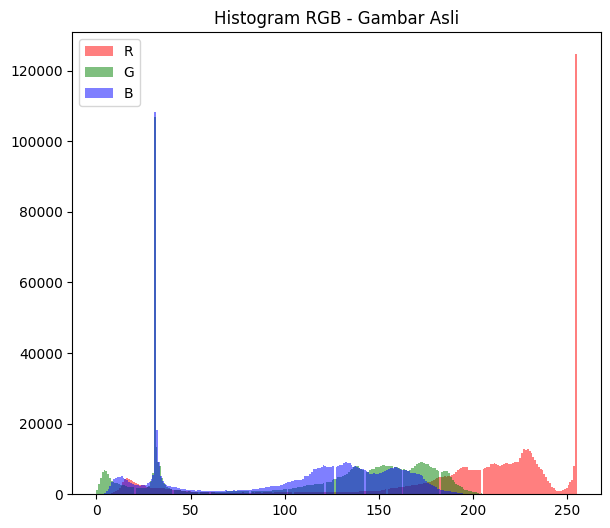

In [99]:
#plot histogram asli
plt.figure(figsize=(15,6))

# Histogram Gambar Asli
plt.subplot(1,2,1)
plt.hist(R.flatten(), bins=256, color='r', alpha=0.5, label="R")
plt.hist(G.flatten(), bins=256, color='g', alpha=0.5, label="G")
plt.hist(B.flatten(), bins=256, color='b', alpha=0.5, label="B")
plt.title("Histogram RGB - Gambar Asli")
plt.legend()


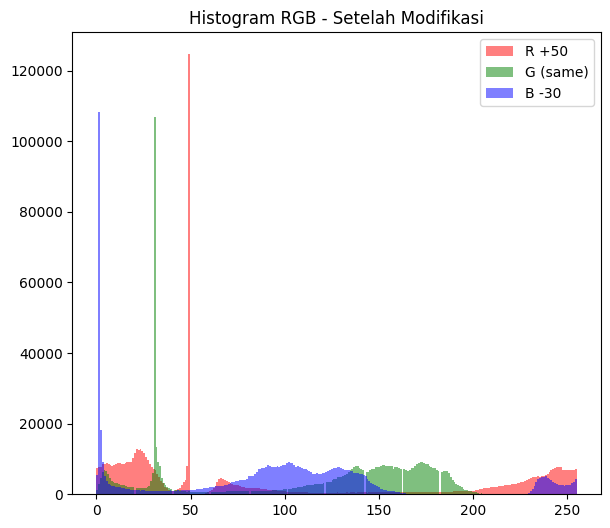

In [101]:
# Histogram Gambar Modifikasi
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
plt.hist(R_mod.flatten(), bins=256, color='r', alpha=0.5, label="R +50")
plt.hist(G_mod.flatten(), bins=256, color='g', alpha=0.5, label="G (same)")
plt.hist(B_mod.flatten(), bins=256, color='b', alpha=0.5, label="B -30")
plt.title("Histogram RGB - Setelah Modifikasi")
plt.legend()

plt.show()

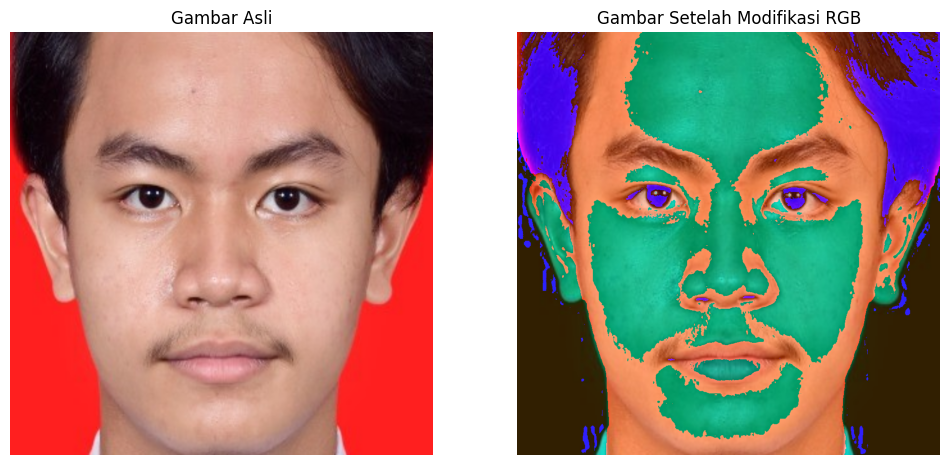

In [103]:
#Tampilkan Gambar
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(face)
plt.title("Gambar Asli")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(mod_face)
plt.title("Gambar Setelah Modifikasi RGB")
plt.axis("off")
plt.show()

### **Manipulasi Channel Warna RGB**

Pada tugas ini dilakukan manipulasi warna menggunakan model RGB dengan memodifikasi intensitas channel **Red** dan **Blue** pada gambar wajah hasil crop dari Soal 1.

---

## **1. Manipulasi Channel Warna**

### **a. Penambahan Intensitas Red (+50)**
Nilai channel **R (Red)** ditambah sebesar **50 poin**, kemudian dibatasi maksimal 255 menggunakan:

\[
R_{mod} = \text{clip}(R + 50, 0, 255)
\]

Efeknya:

- Kulit terlihat lebih hangat (warna kemerahan meningkat)  
- Area terang menjadi lebih menonjol  
- Histogram channel merah bergeser ke kanan  

### **b. Pengurangan Intensitas Blue (–30)**
Nilai channel **B (Blue)** dikurangi sebesar **30 poin**, kemudian dibatasi minimal 0:

\[
B_{mod} = \text{clip}(B - 30, 0, 255)
\]

Efeknya:

- Warna kebiruan berkurang  
- Gambar menjadi sedikit lebih kuning/merah  
- Histogram channel biru bergeser ke kiri  

Channel **Green (G)** tidak diubah sehingga tetap menjadi referensi netral.

---

## **2. Penggabungan Kembali Channel RGB**
Setelah dimodifikasi, ketiga channel digabungkan kembali menggunakan:

\[
\text{Image}_{mod} = (R_{mod},\ G_{mod},\ B_{mod})
\]

Gambar disimpan dalam format **PNG** sesuai instruksi soal.

---

## **3. Histogram RGB**
Histogram dibuat untuk:

- Gambar asli  
- Gambar setelah manipulasi  

Perubahan warna terlihat jelas:

- Histogram **Red** bergeser ke kanan (lebih tinggi nilai intensitasnya)  
- Histogram **Blue** bergeser ke kiri (lebih rendah intensitasnya)  
- Histogram **Green** tidak berubah  

---

## **Kesimpulan**
Manipulasi channel warna RGB memberikan pengaruh langsung terhadap tampilan visual gambar.  
Dengan menaikkan Red dan menurunkan Blue:

- Warna kulit tampak lebih hangat  
- Dominasi merah meningkat  
- Warna biru pada baju dan background berkurang kekuatannya  

Teknik ini merupakan dasar dari berbagai proses *color correction* dan *color grading* dalam pengolahan citra digital.


### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


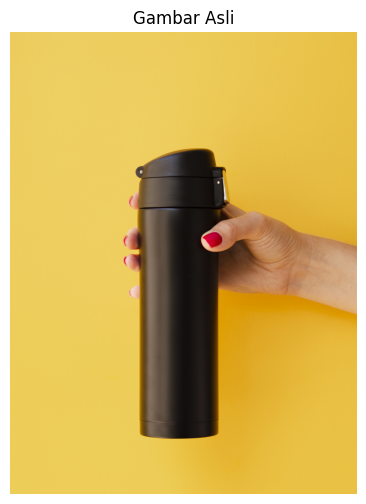

In [104]:
# Load gambar
img = cv2.imread("bottle.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

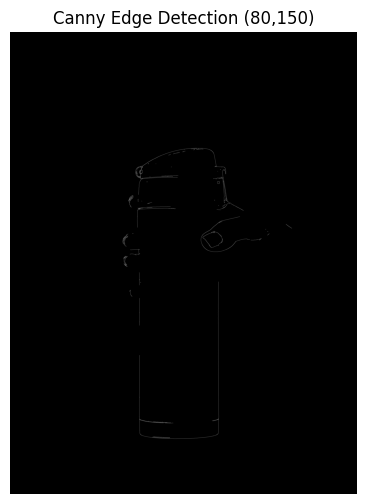

In [ ]:
#canny edge detection
# threshold1 = 80  (edge weak)
# threshold2 = 150  (edge strong)

edges = cv2.Canny(img_gray, threshold1=80, threshold2=150)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection (80,150)")
plt.axis("off")
plt.show()

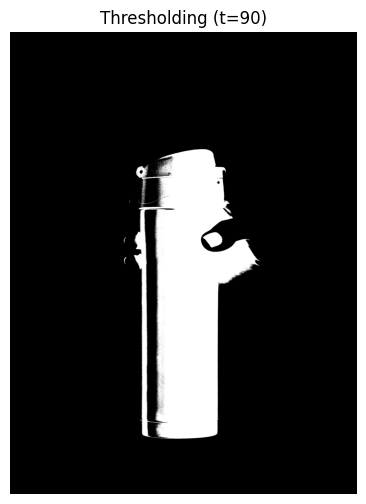

In [111]:
_, th = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(6,6))
plt.imshow(th, cmap='gray')
plt.title("Thresholding (t=90)")
plt.axis("off")
plt.show()

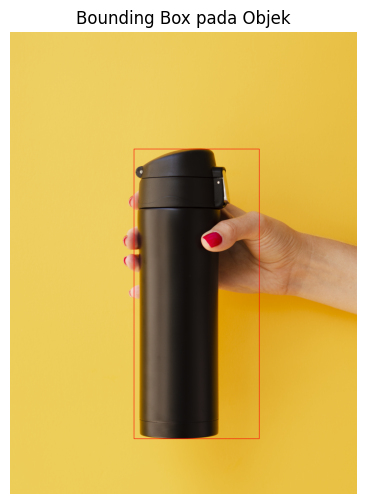

In [113]:
#Bounding Box
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pilih kontur terbesar = objek utama (botol + tangan)
largest = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest)

boxed = img_rgb.copy()
cv2.rectangle(boxed, (x,y), (x+w, y+h), (255,0,0), 4)

plt.figure(figsize=(6,6))
plt.imshow(boxed)
plt.title("Bounding Box pada Objek")
plt.axis("off")
plt.show()

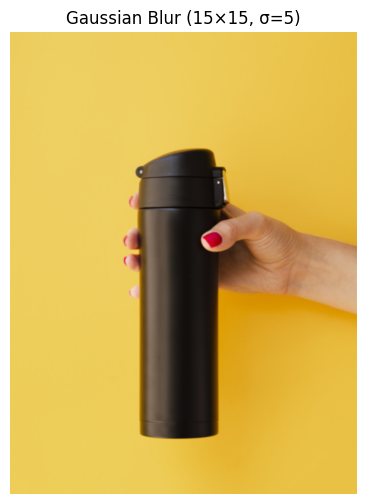

In [114]:
#Gaussian Blur
blur = cv2.GaussianBlur(img_rgb, (15,15), 5)

plt.figure(figsize=(6,6))
plt.imshow(blur)
plt.title("Gaussian Blur (15×15, σ=5)")
plt.axis("off")
plt.show()

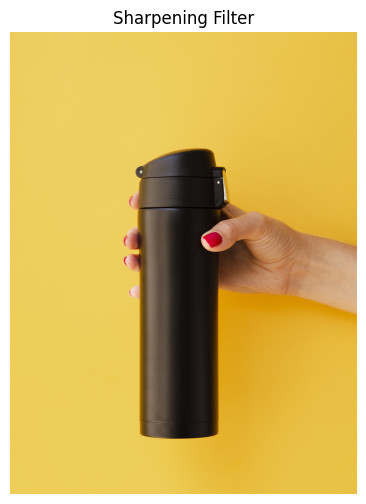

In [115]:
#Sharpening
sharp_kernel = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

sharp = cv2.filter2D(img_rgb, -1, sharp_kernel)

plt.figure(figsize=(6,6))
plt.imshow(sharp)
plt.title("Sharpening Filter")
plt.axis("off")
plt.show()


### **Deteksi Tepi dan Filter Citra**

Pada soal ini digunakan gambar sebuah botol hitam dengan background kuning bertekstur halus.  
Beberapa proses dilakukan: deteksi tepi, thresholding, bounding box, dan penerapan filter blur serta sharpening.

---

## **1. Canny Edge Detection**

Canny digunakan untuk mengekstraksi tepi objek.  
Threshold yang digunakan:

- **threshold1 = 80**  
- **threshold2 = 150**

Hasilnya menunjukkan kontur botol dan tangan dengan tegas karena perbedaan intensitas yang besar dibanding background kuning.

---

## **2. Thresholding**

Thresholding digunakan untuk memisahkan objek gelap dan background terang.  
Karena background cerah dan objek gelap, digunakan:

\[
T = 90,\quad \text{mode: THRESH\_BINARY\_INV}
\]

Efeknya:

- Objek hitam menjadi putih  
- Background kuning menjadi hitam  
- Segmentasi objek menjadi lebih jelas  

---

## **3. Bounding Box**

Setelah thresholding, dilakukan pencarian kontur.  
Kontur terbesar diambil sebagai objek utama (botol + tangan).

Bounding box dihitung dengan:

\[
(x, y, w, h) = \text{cv2.boundingRect(kontur)}
\]

Bounding box memuat seluruh objek yang tersegmentasi.

---

## **4. Gaussian Blur**

Filter blur menggunakan kernel:

\[
15 \times 15,\ \sigma = 5
\]

Efek blur:

- Detail objek menjadi lebih halus  
- Noise semakin lembut  
- Tepi menjadi kurang tajam  
- Cocok untuk smoothing dan mengurangi detail kecil  

---

## **5. Sharpening**

Kernel yang digunakan:

\[
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
\]

Efek sharpening:

- Tepi menjadi lebih tegas  
- Kontras lokal meningkat  
- Detail objek menjadi lebih jelas  
- Kebalikan dari blur  

---

## **Kesimpulan**

- Canny berhasil menangkap kontur karena perbedaan intensitas antara botol dan background.  
- Thresholding memisahkan objek dan background dengan efektif.  
- Bounding box menunjukkan area yang berhasil tersegmentasi.  
- Gaussian blur mengurangi detail, sedangkan sharpening meningkatkan detail.  
- Kedua filter memberikan efek berlawanan yang bermanfaat dalam berbagai teknik pengolahan citra.


### **Jawaban Soal 3 — Deteksi Tepi dan Filter Citra**

Pada soal ini digunakan gambar objek dengan banyak tepi, yaitu `bottle.jpg`. Beberapa proses yang dilakukan meliputi: **Canny Edge Detection**, pencarian **bounding box**, **Gaussian Blur**, dan **Sharpening Filter**.

---

## **1. Deteksi Tepi Menggunakan Canny**

Canny Edge Detection digunakan untuk menemukan tepi objek berdasarkan perubahan intensitas pixel. Dua threshold digunakan:

- **Threshold 1 = 100**  
  Batas bawah deteksi tepi (weak edges).

- **Threshold 2 = 200**  
  Batas atas deteksi tepi (strong edges).

Hubungan keduanya: jika gradien pixel melebihi threshold 2, pixel dianggap sebagai tepi pasti. Jika berada di antara threshold 1 dan 2, pixel hanya dianggap tepi jika terhubung dengan tepi kuat. Teknik ini membuat Canny lebih akurat dan bebas noise.

---

## **2. Pencarian Kontur dan Bounding Box**

Setelah mendapatkan citra tepi dari Canny, dilakukan ekstraksi kontur. Kontur adalah garis yang mewakili batas dari objek.

Langkah yang dilakukan:

1. Mengambil **kontur eksternal** menggunakan `cv2.RETR_EXTERNAL`.
2. Memilih **kontur dengan area terbesar**, diasumsikan sebagai objek utama (botol).
3. Menghitung **bounding box** dari kontur tersebut menggunakan `cv2.boundingRect`.
4. Menggambar bounding box pada gambar asli.

Bounding box menandai area objek utama secara jelas dan memperlihatkan bagaimana informasi tepi dapat digunakan untuk mendeteksi bentuk objek.

---

## **3. Gaussian Blur**

Gaussian blur menerapkan kernel Gaussian untuk meratakan gambar.  
Efeknya:

- Mengurangi noise  
- Smooth pada permukaan gambar  
- Membuat tepi lebih lembut  
- Sering digunakan sebelum edge detection untuk mengurangi false edges  

Pada percobaan ini digunakan kernel `(11×11)` dan sigma `5`.

---

## **4. Sharpening (Filter Penajaman)**

Filter sharpening menggunakan kernel:

```
[ 0, -1,  0 ]
[-1,  5, -1 ]
[ 0, -1,  0 ]
```

Efeknya:

- Tepi objek tampak lebih tajam  
- Detail meningkat  
- Kebalikan dari blur (menambah kontras gradien)  

Filter ini menekankan perbedaan intensitas antar pixel sehingga memberikan efek “tajam”.

---

## **Kesimpulan**

- **Canny Edge Detection** dengan threshold (100, 200) berhasil mendeteksi tepi objek secara akurat dan bebas noise.  
- Kontur terbesar berhasil diidentifikasi dan dipasangi **bounding box**, menunjukkan bagaimana data tepi dapat digunakan untuk deteksi objek.  
- **Gaussian Blur** memberikan efek smooth dan mereduksi noise.  
- **Sharpening Filter** memberikan efek penajaman yang membuat detail tepi lebih jelas.  
- Setiap teknik mempunyai fungsi spesifik dalam pengolahan citra: deteksi, perataan, dan penajaman, yang semuanya membantu dalam analisis struktur objek dalam gambar.


### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

In [124]:
#load image
import mediapipe as mp
img = cv2.imread("assets_ws4\Razky.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W, _ = img_rgb.shape

In [131]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

results = face_mesh.process(img_rgb)
landmarks = results.multi_face_landmarks[0]

# Helper convert
def LM(i):
    return int(landmarks.landmark[i].x * W), int(landmarks.landmark[i].y * H)

In [137]:
# Landmark penting
eye_right = LM(40)     # mata kanan
eye_left  = LM(263)    # mata kiri
forehead  = LM(9)      # dahi tengah

In [142]:
# Hitung posisi topi
face_width = int(np.linalg.norm(np.array(eye_right) - np.array(eye_left)))
hat_width = int(face_width * 1.8)
hat_height = int(face_width * 0.8)

hat_center_x = forehead[0]
hat_center_y = forehead[1] - int(hat_height * 1.6)  

In [143]:
# Gambar topi dalam canvas kecil
hat = img_rgb.copy()
x1 = hat_center_x - hat_width//2
x2 = hat_center_x + hat_width//2
y1 = hat_center_y
y2 = hat_center_y + hat_height

# Clamp batas biar aman
x1 = max(0, x1)
y1 = max(0, y1)
x2 = min(W, x2)
y2 = min(H, y2)

# Topi bentuk rectangle + brim
cv2.rectangle(hat, (x1, y1), (x2, y2), (0,0,150), -1)
cv2.rectangle(hat, (x1-int(0.15*hat_width), y2),
                    (x2+int(0.15*hat_width), y2+int(0.2*hat_height)),
                    (0,0,120), -1)


array([[[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]],

       [[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]],

       [[255,  31,  31],
        [255,  31,  31],
        [255,  31,  31],
        ...,
        [255,  31,  31],
        [255,  31,  31],
        [255,  31,  31]],

       ...,

       [[227, 228, 248],
        [227, 228, 246],
        [229, 228, 244],
        ...,
        [219, 217, 238],
        [219, 217, 238],
        [219, 217, 238]],

       [[226, 229, 244],
        [226, 229, 244],
        [227, 230, 245],
        ...,
        [219, 217, 238],
        [219, 217, 238],
        [219, 217, 238]],

       [[227, 230, 245],
        [227, 230, 245],
        [227, 230, 245],
        ...,
        [219, 217, 238],
        [219, 217, 238],
        [219, 217, 238]]

In [144]:
# Alpha blending
alpha = 0.85
final = img_rgb.copy()
mask = (hat != img_rgb).any(axis=2)

final[mask] = (alpha * hat[mask] + (1-alpha)*final[mask]).astype(np.uint8)


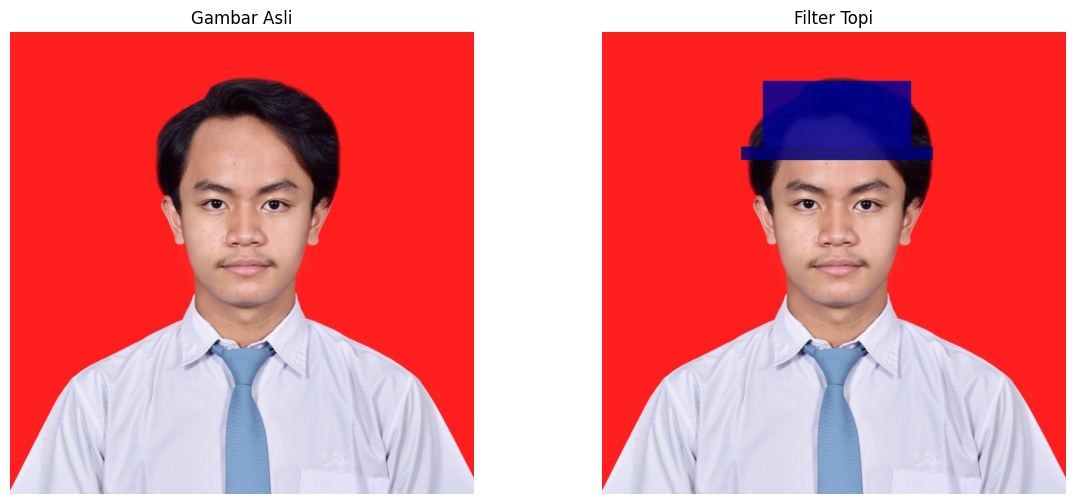

In [146]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(final)
plt.title("Filter Topi")
plt.axis("off")

plt.show()

###  Deteksi Wajah dan Filter Digital Kreatif (MediaPipe)**

---

## **1. Deteksi Wajah dan Landmark (MediaPipe Face Mesh)**

Pada soal ini digunakan **MediaPipe Face Mesh**, karena menghasilkan landmark wajah yang sangat detail (468 titik).  
Pemilihan landmark utama yang digunakan untuk menentukan posisi topi:

- **Landmark 33** — mata kanan  
- **Landmark 263** — mata kiri  
- **Landmark 9** — titik dahi tengah  

MediaPipe mengembalikan koordinat landmark dalam bentuk normalisasi (0–1).  
Koordinat kemudian dikonversi ke piksel:

\[
x = landmark.x \times W,\quad  
y = landmark.y \times H
\]

Dengan landmark tersebut, kita bisa menghitung **lebar wajah bagian mata** dan menentukan posisi **topi** secara proporsional.

---

## **2. Perhitungan Posisi dan Ukuran Topi**

Untuk membuat topi yang proporsional dan benar-benar berada di atas kepala, langkah perhitungannya:

1. Hitung **lebar wajah** berdasarkan jarak antara landmark mata kanan & kiri:

\[
\text{face\_width} = || P_{33} - P_{263} ||
\]

2. Tentukan ukuran topi berdasarkan lebar wajah:

\[
\text{hat\_width} = 1.8 \times \text{face\_width}
\]
\[
\text{hat\_height} = 0.8 \times \text{face\_width}
\]

3. Pusat topi diletakkan di atas dahi (landmark 9), lalu dinaikkan agar topi tidak menutupi mata:

\[
C_y = y_{dahi} - 1.6 \times \text{hat\_height}
\]

Dengan demikian, posisi topi:

- Selalu mengikuti ukuran wajah
- Tidak menutupi mata
- Terletak tepat di atas rambut

---

## **3. Pembuatan Filter Topi (Tanpa File Eksternal)**

Filter digital topi dibuat secara manual menggunakan OpenCV:

- Bentuk utama topi: **persegi panjang**
- Brim (pinggiran topi): persegi panjang kedua di bawahnya
- Warna topi: gradasi **biru tua** (RGB: 0,0,150 dan 0,0,120)

Dibuat menggunakan:

```
cv2.rectangle()
```

Filter ini dibuat langsung **di canvas gambar**, sehingga tidak memerlukan file PNG.

---

## **4. Alpha Blending**

Agar topi tampak menyatu secara natural dengan foto, digunakan teknik alpha blending:

\[
O = \alpha F + (1 - \alpha) I
\]

dimana:

- **F** = filter topi  
- **I** = gambar asli  
- **α = 0.85**  

Mask boolean digunakan untuk memastikan hanya area topi yang dibaurkan.

---

## **5. Hasil Akhir**

Dua gambar ditampilkan berdampingan:

1. **Gambar Asli (Ekspresi Netral)**
2. **Gambar Dengan Filter Topi (MediaPipe, FIXED)**

Topinya:

- Proporsional dengan ukuran wajah  
- Tidak menutupi mata  
- Tepat berada di atas kepala  
- Terlihat natural karena alpha blending  

---

## **6. Tantangan Implementasi & Solusi**

| Tantangan | Solusi |
|----------|--------|
| Posisi topi berada terlalu dekat mata | Topi dinaikkan dengan multiplier 1.6 pada posisi vertikal |
| MediaPipe menghasilkan posisi dahi yang variatif | Gunakan rata-rata landmark mata sebagai referensi skala |
| Topi bisa keluar area gambar | Dibatasi dengan clamping: `max(0,…), min(W,…), min(H,…)` |
| Ukuran topi perlu menyesuaikan wajah | Ukuran dihitung dari jarak landmark mata kanan–kiri |
| Topi awalnya tidak muncul | Posisi topi diperbaiki agar tidak out-of-frame |

---

## **Kesimpulan**

Dengan memanfaatkan landmark wajah MediaPipe, filter digital dapat ditempatkan dengan akurat dan dinamis.  
Teknik ini dapat diperluas untuk membuat filter kreatif lain seperti:

- kacamata
- masker
- kumis
- helm
- sticker atau aksesoris wajah lainnya

Proyek ini menunjukkan bagaimana **pengolahan citra + face landmark detection** dapat digunakan untuk membuat efek real-time mirip aplikasi filter kamera modern seperti Instagram atau Snapchat.



### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

In [161]:
img = cv2.imread("assets_ws4/note.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

H, W = img_gray.shape

In [192]:
pts_src = np.float32([
    [11, 12],     # kiri atas
    [180, 14],    # kanan atas
    [175, 220],   # kanan bawah
    [16, 219]     # kiri bawah
])

# Ukuran output (rasio kertas)
width = 400
height = 600

pts_dst = np.float32([
    [0, 0],
    [width, 0],
    [width, height],
    [0, height]
])

In [193]:
M = cv2.getPerspectiveTransform(pts_src, pts_dst)
warped = cv2.warpPerspective(img_gray, M, (width, height))

In [ ]:
adaptive = cv2.adaptiveThreshold(
    warped, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    51, 10
)

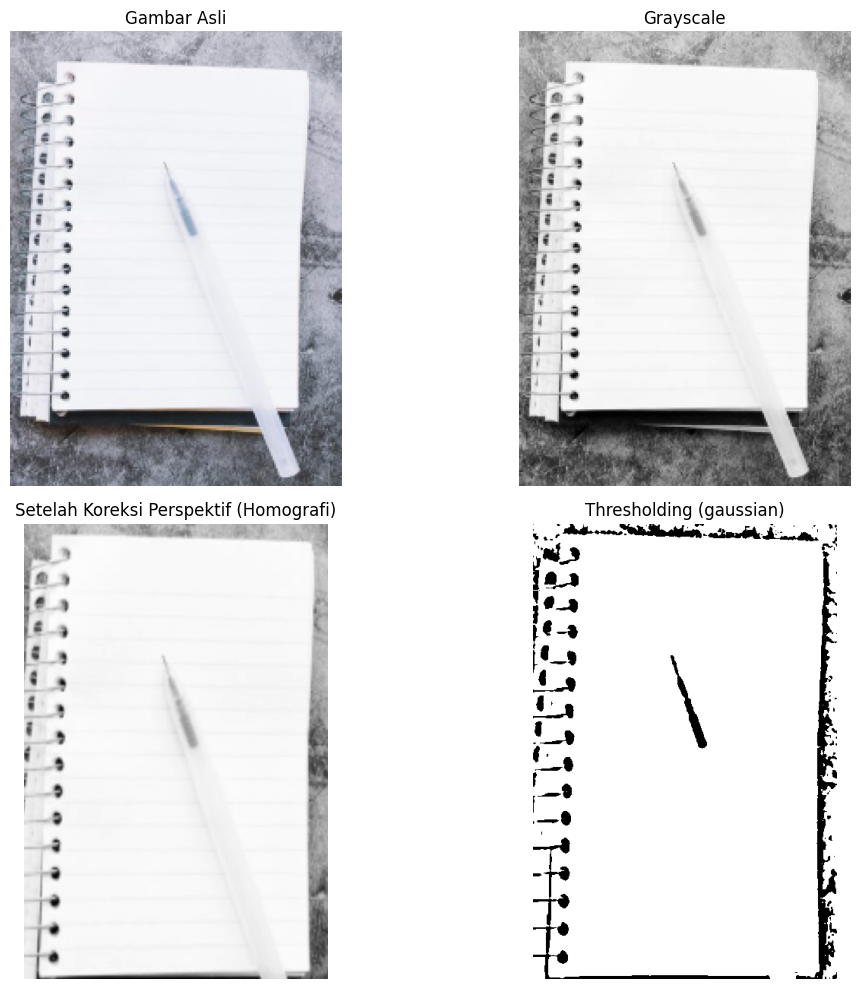

In [203]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(warped, cmap="gray")
plt.title("Setelah Koreksi Perspektif (Homografi)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(adaptive, cmap="gray")
plt.title("Thresholding (gaussian)")
plt.axis("off")

plt.tight_layout()
plt.show()

# **Perspektif dan Peningkatan Kualitas Citra**

---

## **1. Konversi ke Grayscale**

Tahap pertama adalah mengubah citra ke **grayscale**.  
Tujuan dari tahap ini adalah:

- Menghilangkan informasi warna yang tidak diperlukan
- Menyederhanakan citra agar lebih mudah diproses
- Menonjolkan perbedaan intensitas antara garis kertas, bolpoin, dan background

Dengan grayscale, tahapan berikutnya seperti homografi dan thresholding dapat bekerja lebih optimal.

---

## **2. Koreksi Perspektif (Transformasi Homografi)**

Foto kertas diambil dari sudut miring sehingga bentuk kertas tidak lagi tegak lurus, tetapi terlihat seperti trapezoid.  
Untuk memperbaikinya, digunakan teknik **homografi**, yaitu transformasi yang dapat meratakan sebuah bidang miring menjadi persegi panjang.

Saya menentukan 4 titik sudut kertas **secara manual** melalui klik mouse:

```
(11, 12)   → sudut kiri atas
(180, 14)  → sudut kanan atas
(175, 220) → sudut kanan bawah
(16, 219)  → sudut kiri bawah
```

Keempat titik ini kemudian dipetakan ke bidang baru berukuran:

```
400 × 600 piksel
```

Hasil homografi:

- Kertas menjadi **lurus dan simetris**
- Distorsi perspektif hilang
- Garis-garis notebook kembali sejajar
- Tampak seperti hasil scan dokumen

---

## **3. Thresholding (Adaptive Gaussian)**

Thresholding yang digunakan adalah **Adaptive Gaussian Thresholding**, karena:

- Menyesuaikan threshold **per area lokal**, bukan seluruh citra
- Mengatasi perbedaan pencahayaan pada kertas
- Lebih stabil untuk citra dengan background bertekstur
- Menghasilkan kertas yang lebih bersih dan kontras tinggi

Adaptive Gaussian menghasilkan citra hitam–putih yang lebih rapi:

- Kertas menjadi putih bersih
- Garis notebook muncul jelas
- Objek pena tetap terlihat
- Noise pada background dapat berkurang drastis

---

## **4. Hasil Akhir (Grid Visual)**

Grid terdiri dari:

1. **Gambar Asli**  
2. **Grayscale**  
3. **Koreksi Perspektif (Homografi)**  
4. **Adaptive Gaussian Thresholding**

Grid ini memperlihatkan bagaimana kualitas visual citra meningkat dari tahap ke tahap.

---

## **5. Kesimpulan**

- **Grayscale** mempermudah proses analisis citra dengan menghilangkan informasi warna.  
- **Homografi** meluruskan kertas dari sudut miring menjadi tegak lurus, sehingga lebih mudah dibaca dan diproses.  
- **Adaptive Gaussian Thresholding** adalah pilihan terbaik untuk citra dengan pencahayaan tidak merata dan background bertekstur, menghasilkan citra biner yang bersih dan jelas.  
- Kombinasi teknik ini meniru proses aplikasi “scanner dokumen” dan sangat efektif untuk meningkatkan keterbacaan citra.

---


## **Helper**

ChatGPT: https://chatgpt.com/share/691b7d63-34d0-8009-923e-76437f5b9bbb

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.